# 9. Fashion MNIST 이미지 분류하기

https://codetorial.net/tensorflow/fashion_mnist_classification.html

Fashion MNIST 데이터셋은 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이며, 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28*28 픽셀의 이미지 70,000개로 이루어져 있습니다.

이번 페이지에서는 Dense층들로 구성되는 Fully-Connected Neural Network (완전 연결된 인공신경망)을 이용해서 Fashion MNIST 데이터셋을 분류해보겠습니다.

## Fashion MNIST 데이터셋 불러오기

In [14]:
import tensorflow as tf

# 1. Fashion MNIST 데이터 셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

tf.keras.datasets 모듈은 Neural Network의 훈련에 사용될 수 있는 여러 데이터셋을 포함합니다.

7가지 데이터셋이 있습니다

- boston_housing
- cifar10
- cifar100
- fashion_mnist
- imdb
- mnist
- reuters

fashion_mnist 모듈은 데이터셋을 반환하는 load_data()함수를 포함하는데, load_data()함수를 호출하면 NumPy어레이의 튜플을 반환합니다.

train_images와 train_labels는 Neural Network 모델의 훈련(training)에 사용되고,
test_images와 test_labels는 테스트(test)에 사용됩니다.

## Fashion MNIST 데이터셋 살펴보기

trian_images와 train_labels의 첫번째 요소를 각각 출력해보겠습니다.

In [15]:
print(train_images[0])
print(train_labels[0])

train_images는 0~255사이의 값을 갖는 28*28 크기의 NumPy어레이를 갖는 어레이이고,

train_labels는 0~9까지 정수 값을 갖는 어레이입니다.

0~9까지 정수 값은 이미지(옷)의 클래스를 나타내는 레이블입니다. 각각의 레이블과 클래스는 아래와 같습니다.

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

In [16]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

In [17]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

각 어레이의 형태(shape)를 출력해보면,

train_images와 test_images는 각각(28*28)의 형태를 갖는 60,000개, 10,000개 이미지의 어레이,

train_labels와 test_labels는 각각 0~9사이의 정수 60,000개, 10,000개 어레이임을 알 수 있습니다.

## Fashion MNIST 데이터셋 전처리하기

In [18]:
# 2. 데이터 전처리
train_images, test_images = train_images/255.0, test_images/255.0

0 ~ 255사이의 값을 갖는 훈련/테스트 데이터들을 0 ~ 1사이의 값을 갖도록 변환합니다.

## 모델 구성하기

In [19]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

MNIST 인식 예제와 같이 Sequential() 클래스를 이용해서 신경망 모델을 순서대로 구성합니다.

tf.keras.layers.Flatten 클래스는 아래 그림과 같이 입력 데이터를 1차원으로 변환합니다.

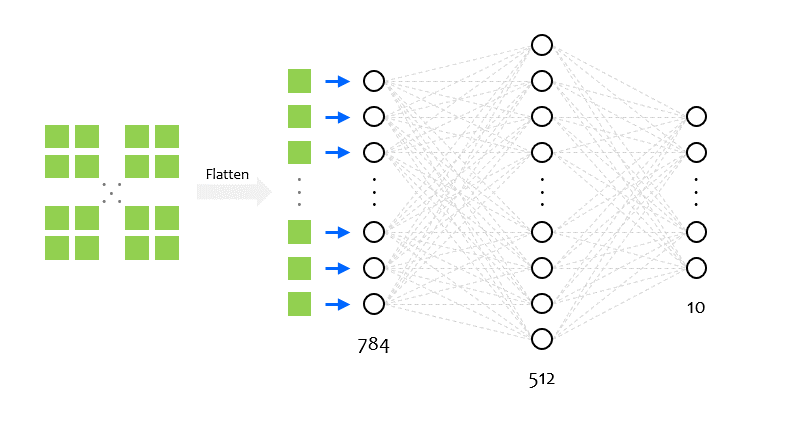

## 모델 컴파일하기

compile()메서드를 이용해서 모델을 훈련하는데 사용할 옵티마이저, 손실함수, 지표를 설정합니다.

In [23]:
# 4. 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

손실함수(loss function)는 훈련과정에서 모델의 오차를 측정하는데 사용됩니다.

옵티마이저(optimizer)는 데이터와 손실함수를 바탕으로 모델의 웨이트(weights)와 바이어스(bias)을 업데이트 하는 방식을 말합니다.

지표(metrics)는 훈련과 테스트 단계를 평가하기 위해 사용됩니다.

accuracy로 설정하면, 이미지를 올바르게 분류한 비율로 모델을 평가합니다.

## 모델 훈련하기

In [24]:
# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)

fit()메서드에 훈련에 사용할 이미지 데이터와 레이블을 입력해줍니다.

에포크(epochs)는 60,000개의 전체 이미지를 몇 번 학습할지를 설정합니다.

## 모델의 정확도 평가하기

evaluate() 메서드를 이용해서 손실(loss), 정확도(accuracy)를 각각 얻을 수 있습니다.

In [26]:
# 6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

5회 epoch의 학습을 통해 10000개의 테스트 이미지를 87%의 정확도로 분류할 수 있음을 의미합니다.

## 예측하기

predict()메서드를 사용하면 모델이 각 이미지의 클래스를 예측하는 결과를 확인할 수 있습니다.

In [32]:
import numpy as np

# 7. 예측하기
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

predictions는 각 test_images에 대한 신경망의 출력값을 나타내는 어레이입니다.

첫번째 예측 predictions[0]을 출력해보면 10개의 값을 갖는 어레이이며, 입력 이미지 데이터가 열 개의 숫자 중 어떤 숫자일 확률을 의미합니다.

np.argmax()함수를 이용해서 가장 높은 값을 갖는 인덱스를 확인해보면 9를 출력합니다.

즉, 학습된 신경망은 이 이미지가 ankle boot라고 예측합니다.

## 뉴런의 개수의 영향

가운데 뉴런층의 뉴런 노드의 개수를 조절하면 훈련에 어떤 영향을 미치는지 알아봅니다.

아래 그림과 같이 뉴런 노드의 개수를 128, 512, 1024로 변화시키면서 세 가지 경우에 대해 훈련과정의 손실과 정확도를 확인해보겠습니다.

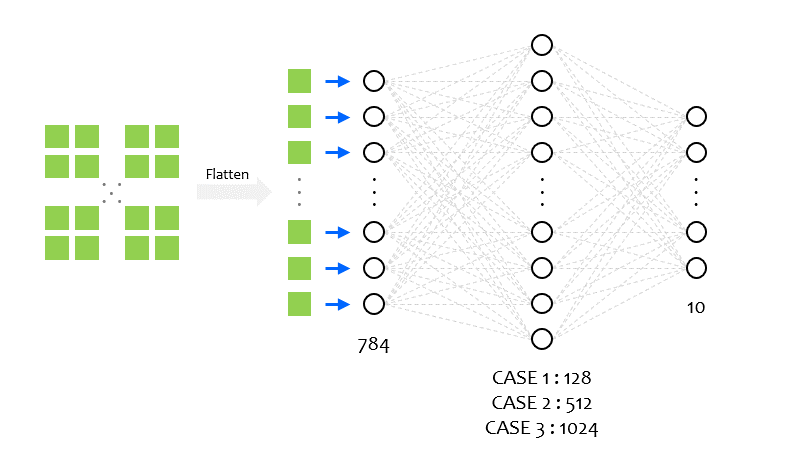

In [ ]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'), #case1
    #tf.keras.layers.Dense(units=512, activation='relu'), #case2
    #tf.keras.layers.Dense(units=1024, activation='relu'), #case3
    tf.keras.layers.Dense(units=10, activation='softmax')
])

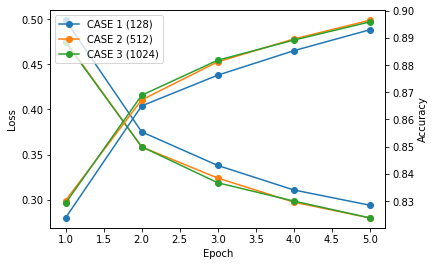

뉴런 노드의 개수가 증가하면 훈련과정에서 손실 값이 감소하고 테스트 정확도는 증가하는 경향이 있습니다.

하지만 계산과 최적화를 필요로 하는 파라미터의 숫자가 증가하기 때문에 훈련에 걸리는 시간은 증가합니다.

512개와 1024개에서 손실과 정확도의 증가가 크지않은 이유는 Fashion MNIST 분류 문제가 비교적 간단한 문제이기 때문입니다.

따라서 문제에 맞게 적절한 개수의 뉴런을 사용하면서 짧은 훈련 시간동안 높은 정확도를 얻는것이 좋습니다.

## 콜백(Callback) 사용하기

tf.keras.callbacks 모듈의 Callback 클래스를 사용하면,

훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있습니다.

In [36]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if logs.get('loss') < 0.3:
#             print('\n훈련을 중지합니다.'.format(epoch))
#             self.model.stop_training = True
            
# callback = myCallback()

In [38]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.3:
            print('\n훈련을 중지합니다.')
            self.model.stop_training = True

callbacks = myCallback()

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, callbacks = [callbacks])

우선 myCallback클래스에 조건식을 사용해서 훈련을 중단할 조건을 지정하고,

fit()메서드에 callbacks 파라미터를 사용해서 이 클래스가 호출되도록 합니다.

on_epoch_end는 각 에포크(epoch)의 끝에 호출되는 메서드입니다.

한 에포크가 끝나고 손실 값이 0.3미만이라면 훈련을 중단하도록 해주었습니다.

총 5회 에포크의 훈련을 설정했음에도 4회 에포크에서 훈련이 중단되었습니다.

에포크에 따른 손실 값과 정확도는 아래와 같습니다.

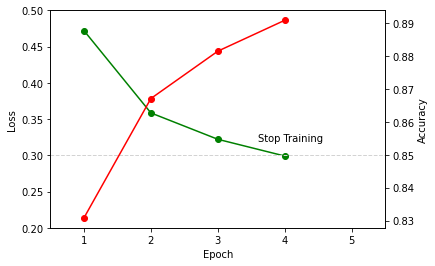